In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [4]:
df.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

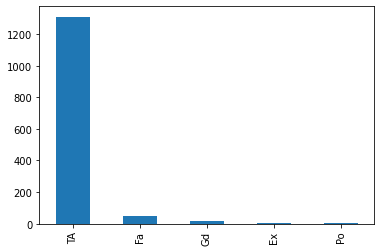

In [6]:
df['GarageQual'].value_counts().plot(kind='bar')


In [7]:
df['GarageQual'].mode()


0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

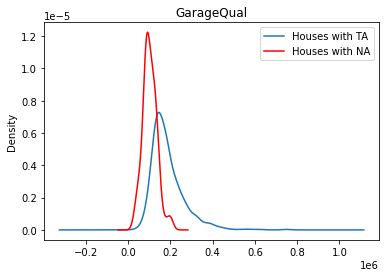

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [11]:
temp = df[df['GarageQual']=='TA']['SalePrice']
temp


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

In [12]:
df['GarageQual'].fillna('TA', inplace=True)


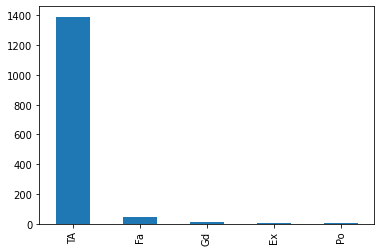

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'GarageQual')

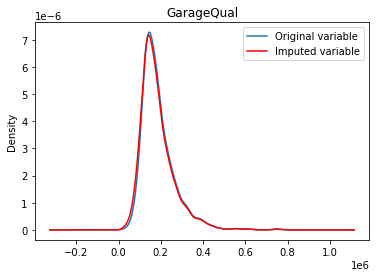

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

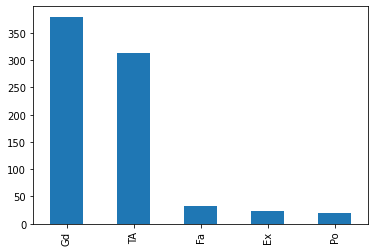

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')


In [16]:
df['FireplaceQu'].mode()


0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

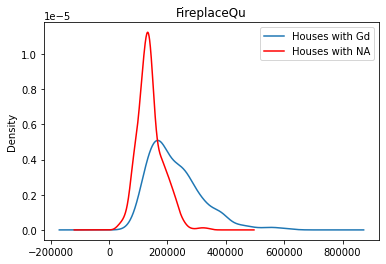

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [18]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']


In [19]:
df['FireplaceQu'].fillna('Gd', inplace=True)


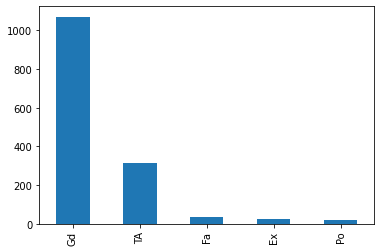

In [20]:
df['FireplaceQu'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'FireplaceQu')

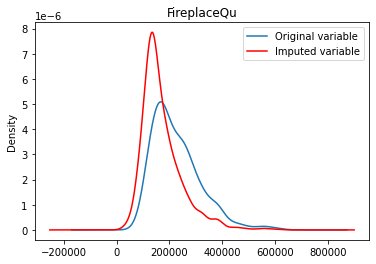

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [23]:
from sklearn.impute import SimpleImputer


In [24]:
imputer = SimpleImputer(strategy='most_frequent')


In [25]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [26]:
imputer.statistics_


array(['Gd', 'TA'], dtype=object)